In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [1]:
#Path to the images
main_path = '/content/drive/MyDrive/Tesis_images/'
#Path to test a patient images
test_patient = '/content/drive/MyDrive/Tesis_images/ID00078637202199415319443'

In [ ]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.6 MB/s eta 0:00:00


# Prediction of pulmonary hypertension in patients with fibrosis #

In [2]:
import pandas as pd
import numpy as np
import os
import imageio
import cv2
import pydicom
import matplotlib.pyplot as plt

from PIL import *
from pathlib import Path

In [3]:
#Path to the images
main_path = '/Volumes/Alekei/Ale/UAQ/Tesis/osic_db/images/'

#Path to test a patient images
test_patient = '/Volumes/Alekei/Ale/UAQ/Tesis/osic_db/images/ID00032637202181710233084'

In [3]:
### Functions to show information and plot one image

#Funtion to return the information of an specifid image
def show_info_image(id_patient, id_image):
    image_pydicom = pydicom.dcmread(main_path+id_patient+'/'+id_image)
    return image_pydicom

#Funtion to return the array of an specifid image
def show_array_image(id_patient, id_image):
    image_pydicom = pydicom.dcmread(main_path+id_patient+'/'+id_image)
    return image_pydicom.pixel_array

#Funtion to show an specifid image
def show_image(image):
    plt.imshow(image, cmap='gray')

In [4]:
#Variable to store the image information
image_pydicom = show_info_image('ID00032637202181710233084', '105.dcm')

#Show all the information
#image_pydicom

#Plotting the image
#show_image(image_pydicom.pixel_array)

### Start to read data

In [5]:
#Create a list with the patient ids folders
patient_folders = os.listdir(main_path)

#Remove the folder created automatically by macOS
#patient_folders.remove('.DS_Store')

#Printing the number of folder ids found
print(len(patient_folders))

for patient_folder in patient_folders:
    if patient_folder.startswith('._'):
        patient_folders.remove(patient_folder)
        
print(len(patient_folders))
patient_folders

352
176


['ID00296637202279895784347',
 'ID00032637202181710233084',
 'ID00061637202188184085559',
 'ID00232637202260377586117',
 'ID00322637202284842245491',
 'ID00329637202285906759848',
 'ID00027637202179689871102',
 'ID00011637202177653955184',
 'ID00042637202184406822975',
 'ID00086637202203494931510',
 'ID00023637202179104603099',
 'ID00235637202261451839085',
 'ID00168637202237852027833',
 'ID00078637202199415319443',
 'ID00331637202286306023714',
 'ID00312637202282607344793',
 'ID00283637202278714365037',
 'ID00365637202296085035729',
 'ID00414637202310318891556',
 'ID00267637202270790561585',
 'ID00400637202305055099402',
 'ID00076637202199015035026',
 'ID00173637202238329754031',
 'ID00192637202245493238298',
 'ID00364637202296074419422',
 'ID00180637202240177410333',
 'ID00132637202222178761324',
 'ID00048637202185016727717',
 'ID00407637202308788732304',
 'ID00426637202313170790466',
 'ID00167637202237397919352',
 'ID00136637202224951350618',
 'ID00305637202281772703145',
 'ID002916

 Se limpiaron previamente las extensiones .raw y .DS_store

In [6]:
## Get number images by patient
num_images = []

for patient in patient_folders:
    images = os.listdir(main_path+patient)
    for image in images:
        if image.startswith('._'):
            images.remove(image)
    counter = len(images)
    #print(counter)
    num_images.append(int(counter))

print(len(num_images))
print(num_images)

176
[31, 205, 253, 67, 106, 260, 358, 31, 497, 30, 27, 296, 253, 1018, 74, 409, 306, 66, 250, 63, 265, 64, 602, 245, 33, 577, 407, 26, 54, 408, 221, 404, 61, 485, 33, 478, 122, 27, 62, 118, 31, 37, 396, 103, 311, 30, 521, 62, 498, 304, 71, 56, 302, 64, 266, 64, 408, 825, 87, 31, 375, 347, 28, 201, 364, 30, 28, 451, 115, 24, 29, 64, 21, 233, 17, 29, 319, 253, 290, 423, 30, 29, 405, 56, 284, 312, 24, 258, 346, 24, 30, 291, 33, 94, 24, 32, 37, 30, 295, 24, 36, 465, 102, 22, 337, 27, 28, 33, 303, 48, 56, 54, 18, 39, 57, 258, 64, 207, 35, 60, 58, 473, 53, 346, 49, 61, 245, 239, 275, 17, 271, 30, 493, 217, 469, 16, 210, 26, 341, 300, 240, 106, 56, 574, 38, 266, 268, 50, 74, 25, 278, 49, 62, 361, 25, 211, 30, 320, 30, 52, 70, 36, 355, 433, 429, 398, 12, 71, 178, 38, 121, 31, 319, 18, 394, 512]


In [7]:
print("Average of images by patients: ", (sum(num_images)/len(num_images)))
print("Max of images by patients: ", max(num_images))
print("Min of images by patients: ", min(num_images))
print("Sum of images: ", sum(num_images))

Average of images by patients:  187.64772727272728
Max of images by patients:  1018
Min of images by patients:  12
Sum of images:  33026


In [8]:
more_data = pd.DataFrame()
more_data['patient_ID'] = patient_folders
more_data['num_images'] = num_images
more_data = more_data.sort_values(by=['num_images'], ascending=False)

In [9]:
chosen_patients = more_data.head(30)
print(len(chosen_patients))
chosen_patients

30


,patient_ID,num_images
13,ID00078637202199415319443,1018
57,ID00202637202249376026949,825
22,ID00173637202238329754031,602
25,ID00180637202240177410333,577
143,ID00035637202182204917484,574
46,ID00317637202283194142136,521
175,ID00108637202209619669361,512
48,ID00104637202208063407045,498
8,ID00042637202184406822975,497
132,ID00020637202178344345685,493


In [10]:
new_patient_file = pd.DataFrame(chosen_patients)
new_patient_file.to_csv('/Volumes/Alekei/Ale/UAQ/Tesis/UAQ resources/chosen_patients.csv', index=False)
print(chosen_patients['num_images'].sum())

14591


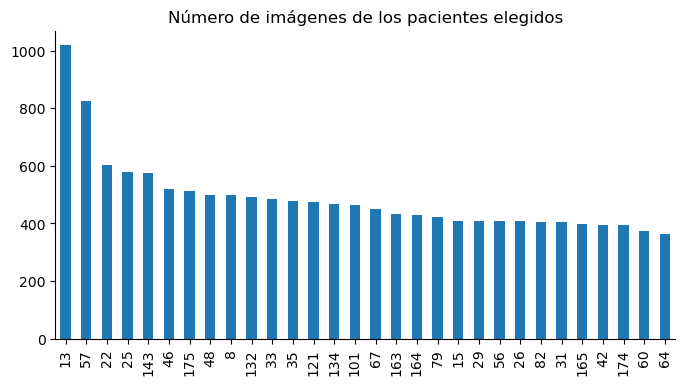

In [11]:
from matplotlib import pyplot as plt
chosen_patients['num_images'].plot(kind='bar', figsize=(8, 4), title='Número de imágenes de los pacientes elegidos')
plt.gca().spines[['top', 'right']].set_visible(False)

### Convert images from DCM to PNG

In [12]:
#New ubication for the database
new_ubi = '/Volumes/Alekei/Ale/UAQ/Tesis/new_osicdb_ready/'
#The correct size for the new images
correct_size = (224, 224)

for patient in chosen_patients['patient_ID']:
    temp_path = main_path+patient+'/'
    images = os.listdir(main_path+patient)
    #print(images)    
    
    #Ubication for the new folder 
    new_ubi_temp = new_ubi + patient
    try:
        os.makedirs(new_ubi_temp)
    except FileExistsError:
        pass
    print(new_ubi_temp)
    
    for image in images:
        #
        if image.startswith('._'):
            pass
        else:
            #Reading the array of the image
            image_pydicom = show_array_image(patient, image)
            #Preprocessing the images
            resized_image = cv2.resize(image_pydicom, correct_size)
            image_temp = cv2.normalize(resized_image, None, 0, 255, cv2.NORM_MINMAX)
            # Covert the images to 3 dimensions (RGB)
            image_temp_rgb = cv2.cvtColor(image_temp.astype('uint8'), cv2.COLOR_GRAY2RGB)
            #Delete the extension DCM
            image = image[:-4] 
            #Creating the final ubication for the new image
            final_ubi = new_ubi_temp + '/' + image + '.png'
            print(final_ubi)
            #Save the image
            plt.imsave(final_ubi, image_temp, cmap='gray')


/Volumes/Alekei/Ale/UAQ/Tesis/new_osicdb_ready/ID00078637202199415319443
/Volumes/Alekei/Ale/UAQ/Tesis/new_osicdb_ready/ID00078637202199415319443/842.png
/Volumes/Alekei/Ale/UAQ/Tesis/new_osicdb_ready/ID00078637202199415319443/856.png
/Volumes/Alekei/Ale/UAQ/Tesis/new_osicdb_ready/ID00078637202199415319443/16.png
/Volumes/Alekei/Ale/UAQ/Tesis/new_osicdb_ready/ID00078637202199415319443/659.png
/Volumes/Alekei/Ale/UAQ/Tesis/new_osicdb_ready/ID00078637202199415319443/881.png
/Volumes/Alekei/Ale/UAQ/Tesis/new_osicdb_ready/ID00078637202199415319443/895.png
/Volumes/Alekei/Ale/UAQ/Tesis/new_osicdb_ready/ID00078637202199415319443/665.png
/Volumes/Alekei/Ale/UAQ/Tesis/new_osicdb_ready/ID00078637202199415319443/103.png
/Volumes/Alekei/Ale/UAQ/Tesis/new_osicdb_ready/ID00078637202199415319443/117.png
/Volumes/Alekei/Ale/UAQ/Tesis/new_osicdb_ready/ID00078637202199415319443/671.png
/Volumes/Alekei/Ale/UAQ/Tesis/new_osicdb_ready/ID00078637202199415319443/498.png
/Volumes/Alekei/Ale/UAQ/Tesis/new_osi

# Working with the new images

In [13]:
#Path to the images
main_path = '/Volumes/Alekei/Ale/UAQ/Tesis/new_osicdb_ready/'

### Getting the path of the images

In [15]:
#Reading the patients id
patients_list = os.listdir(main_path)
#Get the array of every image and add it to a list
path_images = []

for patient in patients_list:
    if patient.startswith('._'):
        pass
    else:
        temp_path = main_path+patient+'/'
        images = os.listdir(main_path+patient)
        for image in images:
            if image.startswith('._'):
                pass
            else:
                temp_path_image = temp_path + image
                path_images.append(temp_path_image)

print(len(path_images))
print(path_images[0])

14591
/Volumes/Alekei/Ale/UAQ/Tesis/new_osicdb_ready/ID00078637202199415319443/842.png


## Resize the images

Imagenes de 512x512: 9778 <br>
Imagenes de 768x768: 4813

In [20]:
import matplotlib.pyplot as plt 
import matplotlib.image as img 

In [21]:
images_array = []

correct_size = (224, 224)

for path_image in path_images:
    image = img.imread(path_image)
    img_size = image.shape
    if img_size != correct_size:
        image = cv2.resize(image, correct_size)
        images_array.append(image)
    else:
        images_array.append(image)

print(len(images_array))


## guardar las imagenes ya con nueva dimensión y normalizado.

14591


## Normalize images

In [22]:
print(images_array[0])
for i in range (0, len(images_array)):
    images_array[i] = cv2.normalize(images_array[i], None, 0, 255, cv2.NORM_MINMAX)
print(images_array[0])

## guardar las imagenes ya con nueva dimensión y normalizado.
## gretelai  datos sintenticos

[[[0.08235295 0.08235295 0.08235295 1.        ]
  [0.08235294 0.08235294 0.08235294 1.        ]
  [0.08235294 0.08235294 0.08235294 1.        ]
  ...
  [0.08235294 0.08235294 0.08235294 1.        ]
  [0.08235294 0.08235294 0.08235294 1.        ]
  [0.08235294 0.08235294 0.08235294 1.        ]]

 [[0.08235295 0.08235295 0.08235295 1.        ]
  [0.08235294 0.08235294 0.08235294 1.        ]
  [0.08235294 0.08235294 0.08235294 1.        ]
  ...
  [0.08235294 0.08235294 0.08235294 1.        ]
  [0.08235294 0.08235294 0.08235294 1.        ]
  [0.08235294 0.08235294 0.08235294 1.        ]]

 [[0.08235295 0.08235295 0.08235295 1.        ]
  [0.08235294 0.08235294 0.08235294 1.        ]
  [0.08235294 0.08235294 0.08235294 1.        ]
  ...
  [0.08235294 0.08235294 0.08235294 1.        ]
  [0.08235294 0.08235294 0.08235294 1.        ]
  [0.08235294 0.08235294 0.08235294 1.        ]]

 ...

 [[0.08235295 0.08235295 0.08235295 1.        ]
  [0.08235294 0.08235294 0.08235294 1.        ]
  [0.08235

### Classification of images

In [4]:
import tensorflow as tf

In [5]:
batch_size = 8
img_height = 224
img_width = 224

In [6]:
#Path to the images
main_path = '/Volumes/Alekei/Ale/UAQ/Tesis/new_osicdb_ready/'

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  main_path,
  #validation_split=0.2,
  #subset="training",
  #seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 29182 files belonging to 30 classes.


2024-08-30 22:57:39.199397: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-08-30 22:57:39.199444: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-08-30 22:57:39.199494: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-08-30 22:57:39.200422: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-30 22:57:39.200853: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [20]:
from tensorflow.keras import layers, models
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test = train_test_split(reshaped_images, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape)

(11672, 224, 224, 1) (2919, 224, 224, 1)


In [25]:
# Load a pre-trained model (ResNet50)
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, pooling='avg')

2024-07-25 09:43:57.584088: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-07-25 09:43:57.584147: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-07-25 09:43:57.584158: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-07-25 09:43:57.585117: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-25 09:43:57.585374: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [26]:
X_train = tf.keras.applications.resnet50.preprocess_input(X_train)
X_test = tf.keras.applications.resnet50.preprocess_input(X_test)

IndexError: index 1 is out of bounds for axis 3 with size 1

In [30]:
train_features = base_model.predict(X_train)
test_features = base_model.predict(X_test)

ValueError: in user code:

    File "/Users/alechiquito/anaconda3/envs/tensorflow_1_1/lib/python3.8/site-packages/keras/src/engine/training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "/Users/alechiquito/anaconda3/envs/tensorflow_1_1/lib/python3.8/site-packages/keras/src/engine/training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/alechiquito/anaconda3/envs/tensorflow_1_1/lib/python3.8/site-packages/keras/src/engine/training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/alechiquito/anaconda3/envs/tensorflow_1_1/lib/python3.8/site-packages/keras/src/engine/training.py", line 2283, in predict_step
        return self(x, training=False)
    File "/Users/alechiquito/anaconda3/envs/tensorflow_1_1/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/alechiquito/anaconda3/envs/tensorflow_1_1/lib/python3.8/site-packages/keras/src/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'resnet50' (type Functional).
    
    Input 0 of layer "conv1_pad" is incompatible with the layer: expected ndim=4, found ndim=3. Full shape received: (None, 224, 224)
    
    Call arguments received by layer 'resnet50' (type Functional):
      • inputs=tf.Tensor(shape=(None, 224, 224), dtype=float32)
      • training=False
      • mask=None


In [ ]:
# Apply K-means clustering
k = 4

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(train_features)
cluster_labels = kmeans.predict(test_features)